
Research Study: Using Supervised Machine Learning Classifiers to predict Diabetic Retinopathy in patients


Contents:

1. Importing modules and data set
2. Checking Data and sanity checks
3. Data Exploratory Analysis, Visualisations
4. Data cleaning, preprocessing and feature engineering
5. Logistic Regression modelling and evaluation 
6. Support Vector Machine modellingand evaluation


In [92]:
#1. Import needed modules
print('Importing needed modules')
import numpy as np
import pandas as pd

from scipy.io import arff
import urllib.request
import io


Importing needed modules


In [93]:
#2. Import data from data source website
print('Import data from data source website')
diabetesdataim= urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff")
data, meta = arff.loadarff(io.StringIO(diabetesdataim.read().decode('utf-8')))


Import data from data source website


In [94]:
#3
print(' Data Exploration and visualisation')

 Data Exploration and visualisation


In [95]:
#4
diabetesdf=pd.DataFrame(data)
print(diabetesdf.dtypes)

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
Class     object
dtype: object


In [96]:
#preview of dataframewith no column names
#5
print('The top 5 rows of columns')
print(diabetesdf.head())

print('The bottom 5 rows of columns')
print(diabetesdf.tail())



The top 5 rows of columns
     0    1     2     3     4     5     6     7          8          9  \
0  1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1  1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2  1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3  1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4  1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   

          10        11        12        13        14        15        16  \
0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923  0.486903   
1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   

         17   18 Class  
0  0.100025  1.0  b'0'  
1  0.144414  0.0  b'0'  
2  

In [97]:
#6
colnames=['quality_assessment', 'severe retinal abnormality','MA1', 'MA2' , 'MA3', 'MA4', 'MA5', 'MA6','E1','E2','E3','E4','E5','E6','E7', 'E8','euclidean_d','diameterOD','amfmclassification','Class_label']



In [98]:
#7
#preview of dataframe
diabetesdf.columns=colnames
print(diabetesdf.head())
#whole dataframe
print(diabetesdf)

   quality_assessment  severe retinal abnormality   MA1   MA2   MA3   MA4  \
0                 1.0                         1.0  22.0  22.0  22.0  19.0   
1                 1.0                         1.0  24.0  24.0  22.0  18.0   
2                 1.0                         1.0  62.0  60.0  59.0  54.0   
3                 1.0                         1.0  55.0  53.0  53.0  50.0   
4                 1.0                         1.0  44.0  44.0  44.0  41.0   

    MA5   MA6         E1         E2         E3        E4        E5        E6  \
0  18.0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  16.0  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  47.0  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  43.0  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  39.0  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

         E7        E8  euclidean_d  diameterOD  amfmclas

In [99]:
#8
diabetesdf.describe()

quality_assessment  severe retinal abnormality          MA1  \
count         1151.000000                 1151.000000  1151.000000   
mean             0.996525                    0.918332    38.428323   
std              0.058874                    0.273977    25.620913   
min              0.000000                    0.000000     1.000000   
25%              1.000000                    1.000000    16.000000   
50%              1.000000                    1.000000    35.000000   
75%              1.000000                    1.000000    55.000000   
max              1.000000                    1.000000   151.000000   

               MA2          MA3          MA4          MA5          MA6  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     36.909644    35.140747    32.297133    28.747176    21.151173   
std      24.105612    22.805400    21.114767    19.509227    15.101560   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      16.000000    15.000000    14.000000    11.000000     8.000000   
50%      35.000000    32.000000    29.000000    25.000000    18.000000   
75%      53.000000    51.000000    48.000000    43.000000    32.000000   
max     132.000000   120.000000   105.000000    97.000000    89.000000   

                E1           E2           E3           E4           E5  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     64.096674    23.088012     8.704610     1.836489     0.560738   
std      58.485289    21.602696    11.567589     3.923224     2.484111   
min       0.349274     0.000000     0.000000     0.000000     0.000000   
25%      22.271597     7.939315     1.249050     0.081554     0.000000   
50%      44.249119    17.038020     4.423472     0.484829     0.022248   
75%      87.804112    31.305692    11.766880     1.921648     0.191953   
max     403.939108   167.131427   106.070092    59.766121    51.423208   

                E6           E7           E8  euclidean_d   diameterOD  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.212290     0.085674     0.037225     0.523212     0.108431   
std       1.057126     0.398717     0.178959     0.028055     0.017945   
min       0.000000     0.000000     0.000000     0.367762     0.057906   
25%       0.000000     0.000000     0.000000     0.502855     0.095799   
50%       0.001554     0.000000     0.000000     0.523308     0.106623   
75%       0.038450     0.004832     0.003851     0.543670     0.119591   
max      20.098605     5.937799     3.086753     0.592217     0.219199   

       amfmclassification  
count         1151.000000  
mean             0.336229  
std              0.472624  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

In [100]:
#9
type(diabetesdf)

pandas.core.frame.DataFrame

In [101]:
#10
# Total number of rows and columns
print(diabetesdf.shape)

(1151, 20)


In [102]:
#11
# Rows containing duplicate data
duplicate_rows_diabetesdf = diabetesdf[diabetesdf.duplicated()]
print('count of duplicate rows: ', duplicate_rows_diabetesdf.shape)
# Dropping the duplicates 
diabetesdf= diabetesdf.drop_duplicates()



count of duplicate rows:  (5, 20)


In [103]:
#12
print(diabetesdf.shape)

(1146, 20)


In [104]:
#13
X=diabetesdf.drop(['Class_label'], axis=1)
print(X.head())


   quality_assessment  severe retinal abnormality   MA1   MA2   MA3   MA4  \
0                 1.0                         1.0  22.0  22.0  22.0  19.0   
1                 1.0                         1.0  24.0  24.0  22.0  18.0   
2                 1.0                         1.0  62.0  60.0  59.0  54.0   
3                 1.0                         1.0  55.0  53.0  53.0  50.0   
4                 1.0                         1.0  44.0  44.0  44.0  41.0   

    MA5   MA6         E1         E2         E3        E4        E5        E6  \
0  18.0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  16.0  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  47.0  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  43.0  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  39.0  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

         E7        E8  euclidean_d  diameterOD  amfmclas

In [105]:
#14
def convert_to_int(label):
    if label==b'0':
        return 0
    elif label ==b"1":
        return 1
    else :
        raise ValueError

diabetesdf['Class_label1or0'] = diabetesdf['Class_label'].apply(convert_to_int)
diabetesdf = diabetesdf.drop(['Class_label'],axis=1)
print(diabetesdf.head())



   quality_assessment  severe retinal abnormality   MA1   MA2   MA3   MA4  \
0                 1.0                         1.0  22.0  22.0  22.0  19.0   
1                 1.0                         1.0  24.0  24.0  22.0  18.0   
2                 1.0                         1.0  62.0  60.0  59.0  54.0   
3                 1.0                         1.0  55.0  53.0  53.0  50.0   
4                 1.0                         1.0  44.0  44.0  44.0  41.0   

    MA5   MA6         E1         E2         E3        E4        E5        E6  \
0  18.0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  16.0  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  47.0  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  43.0  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  39.0  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

         E7        E8  euclidean_d  diameterOD  amfmclas

In [106]:
#15
y=diabetesdf[['Class_label1or0']]

print(y.head())


   Class_label1or0
0                0
1                0
2                1
3                0
4                1


In [107]:
#16
#exploratory data analytics with a scatter matrix of the features

import matplotlib.pyplot as plt
plt.style.use('ggplot')


<function matplotlib.pyplot.show(*args, **kw)>

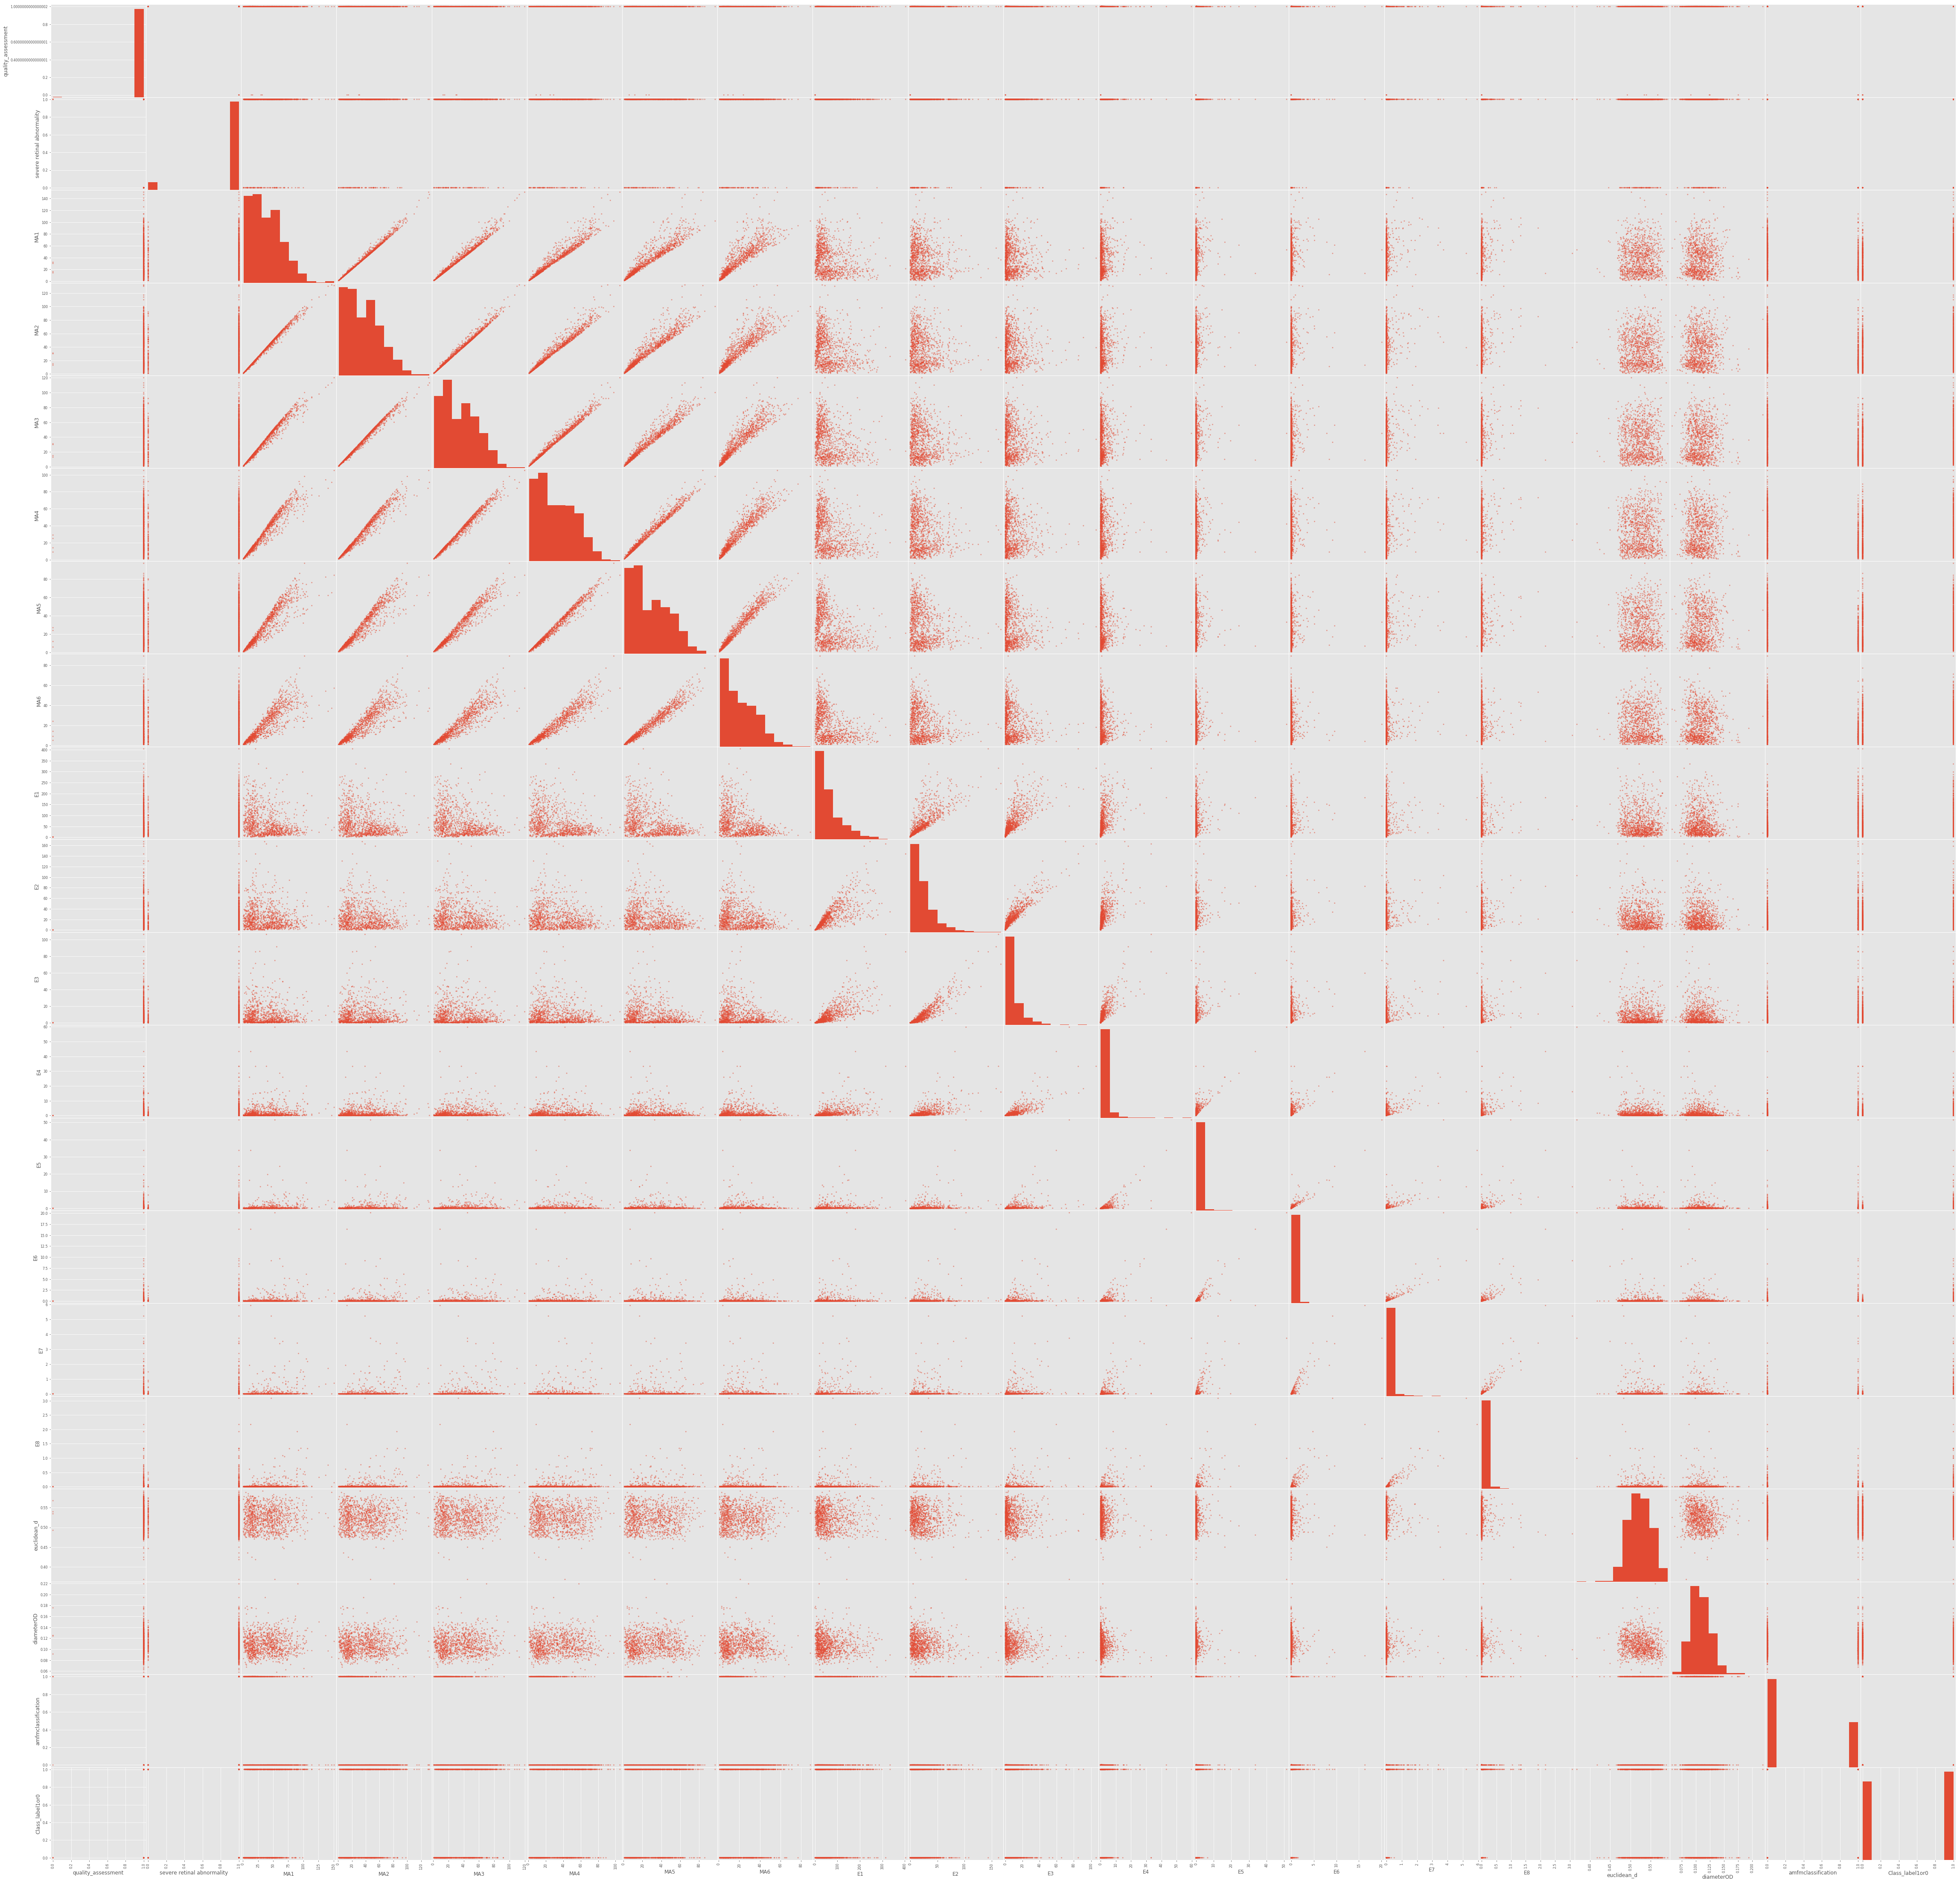

In [108]:
#17
pd.plotting.scatter_matrix(diabetesdf, figsize=(80,80))
plt.show

In [109]:
#18
Xless=diabetesdf[['quality_assessment', 'severe retinal abnormality','MA4','E6','euclidean_d','diameterOD','amfmclassification','Class_label1or0']]

print(Xless.head())

   quality_assessment  severe retinal abnormality   MA4        E6  \
0                 1.0                         1.0  19.0  0.006864   
1                 1.0                         1.0  18.0  0.003903   
2                 1.0                         1.0  54.0  0.373252   
3                 1.0                         1.0  50.0  0.272434   
4                 1.0                         1.0  41.0  0.000000   

   euclidean_d  diameterOD  amfmclassification  Class_label1or0  
0     0.486903    0.100025                 1.0                0  
1     0.520908    0.144414                 0.0                0  
2     0.530904    0.128548                 0.0                1  
3     0.483284    0.114790                 0.0                0  
4     0.475935    0.123572                 0.0                1  


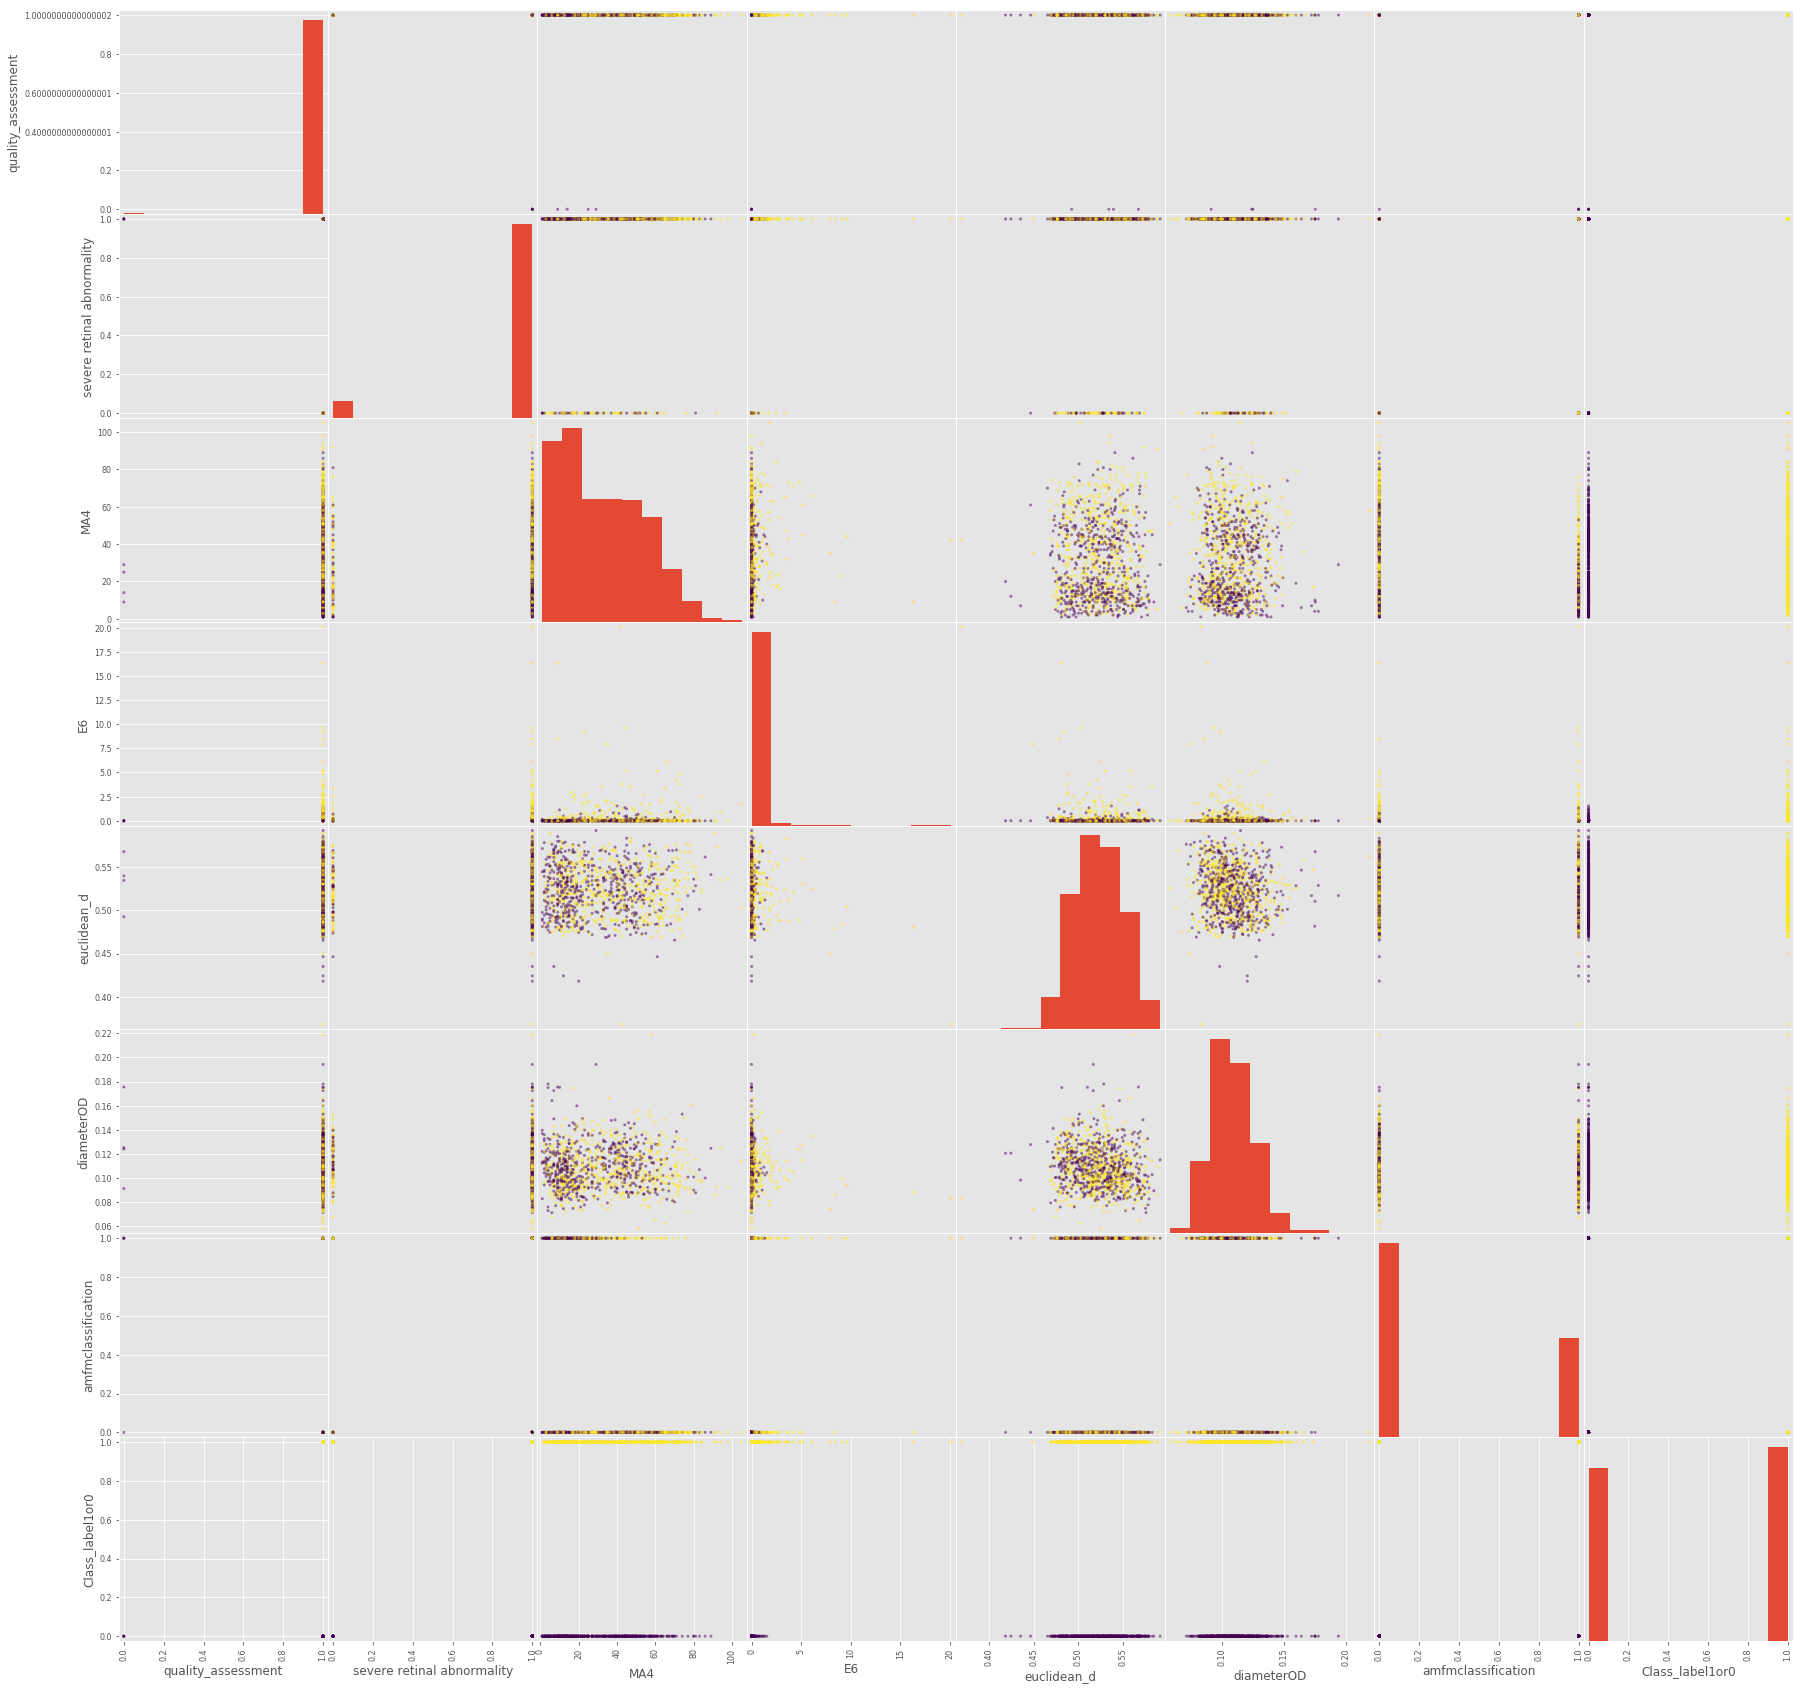

In [110]:
#19
#exploratory data analytics with a scatter matrix of the features

plt.style.use('ggplot')
pd.plotting.scatter_matrix(Xless,figsize=(30,30), c=Xless['Class_label1or0'])
plt.savefig('Scatter')
plt.show()

In [111]:
#20
# Iterate over the columns to search for missing values
print('Exploring the data to search for missing Values that need cleaning')

for  column in diabetesdf:
    columntoreview = diabetesdf[[column]]
    print('number of missing values:', columntoreview.isnull().sum())



Exploring the data to search for missing Values that need cleaning
number of missing values: quality_assessment    0
dtype: int64
number of missing values: severe retinal abnormality    0
dtype: int64
number of missing values: MA1    0
dtype: int64
number of missing values: MA2    0
dtype: int64
number of missing values: MA3    0
dtype: int64
number of missing values: MA4    0
dtype: int64
number of missing values: MA5    0
dtype: int64
number of missing values: MA6    0
dtype: int64
number of missing values: E1    0
dtype: int64
number of missing values: E2    0
dtype: int64
number of missing values: E3    0
dtype: int64
number of missing values: E4    0
dtype: int64
number of missing values: E5    0
dtype: int64
number of missing values: E6    0
dtype: int64
number of missing values: E7    0
dtype: int64
number of missing values: E8    0
dtype: int64
number of missing values: euclidean_d    0
dtype: int64
number of missing values: diameterOD    0
dtype: int64
number of missing values

In [112]:
#21
# What is the percentage of each class label of the total dataset.  
All = diabetesdf.shape[0]
print('Total number of participants/data instances:',All)
signsDR = diabetesdf[diabetesdf['Class_label1or0'] == 1]
nillsignsDR = diabetesdf[diabetesdf['Class_label1or0'] == 0]

percentageofpositive = len(signsDR)/All
percentageofnegative = len(nillsignsDR)/All

print(' Percentage of participants with signs of DR :',percentageofpositive*100,'%')
print('Percentage of participants with signs of DR :',percentageofnegative*100,'%')

print(' No need to stratify the class labels and there is approximately equal distribution betweeb classes ')

Total number of participants/data instances: 1146
 Percentage of participants with signs of DR : 52.879581151832454 %
Percentage of participants with signs of DR : 47.12041884816754 %
 No need to stratify the class labels and there is approximately equal distribution betweeb classes 


There are only 4 low quality assessments


1.0    1142
0.0       4
Name: quality_assessment, dtype: int64

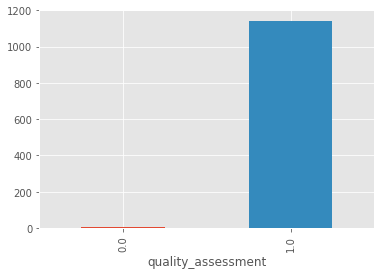

In [113]:
#22
# checking the distribution of the low quality assessment.
print('There are only 4 low quality assessments')
barchartofclasslabelandquality=diabetesdf[['Class_label1or0','quality_assessment']]

barchartofclasslabelandquality.groupby('quality_assessment').size().plot(kind='bar')

# The count of the quality of the assessments grouped by Class label
diabetesdf['quality_assessment'].value_counts()


In [114]:
#23
# Display the only 4 low quality assessment rows. All show significant signs of DR
lowqualityassessment=diabetesdf.loc[diabetesdf['quality_assessment'] == 0]
print(lowqualityassessment)

     quality_assessment  severe retinal abnormality   MA1   MA2   MA3   MA4  \
125                 0.0                         1.0  16.0  15.0  15.0  14.0   
569                 0.0                         1.0  14.0  13.0  13.0   9.0   
694                 0.0                         1.0  30.0  30.0  30.0  25.0   
900                 0.0                         1.0  32.0  31.0  31.0  29.0   

      MA5   MA6        E1        E2        E3   E4   E5   E6   E7   E8  \
125  12.0   9.0  1.585571  0.064843  0.004632  0.0  0.0  0.0  0.0  0.0   
569   6.0   5.0  0.349274  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
694  24.0  14.0  1.259315  0.003098  0.001549  0.0  0.0  0.0  0.0  0.0   
900  27.0  24.0  1.362503  0.050126  0.000000  0.0  0.0  0.0  0.0  0.0   

     euclidean_d  diameterOD  amfmclassification  Class_label1or0  
125     0.492522    0.125055                 1.0                0  
569     0.567809    0.175413                 1.0                0  
694     0.539694    0.123918 

 numerical split of class labels in entire data set


1    606
0    540
Name: Class_label1or0, dtype: int64


 numerical split of class labels in instances with Class label 1


1.0    544
0.0     62
Name: severe retinal abnormality, dtype: int64


Bar Chart showing the frquency of participants with severe retinal abnormality who have the Class label of signs of Diabetic Retinopathy


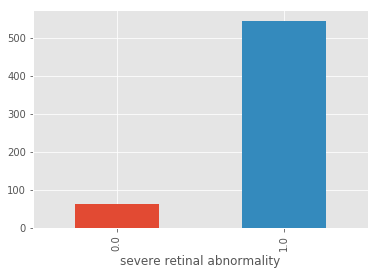

In [115]:
#24
#Creating a bar chart to show a visual representation of distribution of severe retinal abnormality and class label 1( signs of DR)

print(' numerical split of class labels in entire data set')
print("\n")
dfbarchartcomparinglabels1with_retinalabnormality= diabetesdf[['Class_label1or0','severe retinal abnormality']]
print(dfbarchartcomparinglabels1with_retinalabnormality['Class_label1or0'].value_counts())
print("\n")


print(' numerical split of class labels in instances with Class label 1')
print("\n")
print(diabetesdf[diabetesdf['Class_label1or0']==1]['severe retinal abnormality'].value_counts())
print("\n")
print('Bar Chart showing the frquency of participants with severe retinal abnormality who have the Class label of signs of Diabetic Retinopathy')
barchart1= dfbarchartcomparinglabels1with_retinalabnormality.loc[dfbarchartcomparinglabels1with_retinalabnormality['Class_label1or0'] == 1]
barchart1.groupby('severe retinal abnormality').size().plot(kind='bar')




In [116]:
#Adding a Class label 0 column to the diabetesdf dataframe
#25
print('Adding a Class label 0 column to the diabetesdf dataframe')
print("\n")
diabetesdf['Classlabel0']=diabetesdf['Class_label1or0']==0
print((diabetesdf.loc[diabetesdf['Classlabel0'] != 0]).head())


Adding a Class label 0 column to the diabetesdf dataframe


    quality_assessment  severe retinal abnormality   MA1   MA2   MA3   MA4  \
0                  1.0                         1.0  22.0  22.0  22.0  19.0   
1                  1.0                         1.0  24.0  24.0  22.0  18.0   
3                  1.0                         1.0  55.0  53.0  53.0  50.0   
7                  1.0                         1.0   6.0   6.0   6.0   6.0   
10                 1.0                         1.0  45.0  45.0  45.0  43.0   

     MA5   MA6         E1         E2     ...             E4        E5  \
0   18.0  14.0  49.895756  17.775994     ...       0.771761  0.018632   
1   16.0  13.0  57.709936  23.799994     ...       0.234185  0.003903   
3   43.0  31.0  40.467228  18.445954     ...       3.079428  0.840261   
7    2.0   1.0  20.679649   9.497786     ...       0.150382  0.000000   
10  40.0  32.0  84.358401  50.977459     ...       1.974419  0.000000   

          E6        E7        E8

 numerical split of class labels in entire data set


False    606
True     540
Name: Classlabel0, dtype: int64


 numerical split of class labels in instances with Class label 0


1.0    508
0.0     32
Name: severe retinal abnormality, dtype: int64
 Bar chart showing distribution of severe retinal abnormality and non severe abnormality in the negative class label 




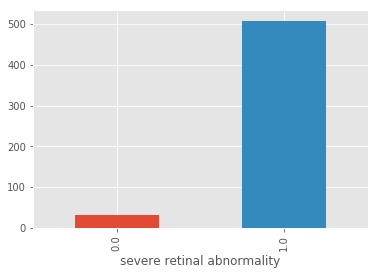

In [117]:
#26

#Creating a bar chart to show a visual representation of distribution of severe retinal abnormality and class label 0
print(' numerical split of class labels in entire data set')
print("\n")
dfbarchartcomparinglabels0with_retinalabnormality= diabetesdf[['Classlabel0','severe retinal abnormality']]
print(dfbarchartcomparinglabels0with_retinalabnormality['Classlabel0'].value_counts())
print("\n")

print(' numerical split of class labels in instances with Class label 0')
print("\n")
print(diabetesdf[diabetesdf['Class_label1or0']==0]['severe retinal abnormality'].value_counts())

# Bar chart showing distribution of severe retinal abnormality and non severe abnormality in the negative class label 
print(' Bar chart showing distribution of severe retinal abnormality and non severe abnormality in the negative class label ')
print("\n")
barchart0=dfbarchartcomparinglabels0with_retinalabnormality.loc[dfbarchartcomparinglabels0with_retinalabnormality['Classlabel0'] == True]
barchart0.groupby('severe retinal abnormality').size().plot(kind='bar')

# Bar chart showing distribution of severe retinal abnormality  in the class label with no sign of DR
#barchart0=dfbarchartcomparinglabels0with_retinalabnormality.loc[dfbarchartcomparinglabels0with_retinalabnormality['Classlabel0'] == 0]
#barchart0.groupby('severe retinal abnormality').size().plot(kind='bar')



Creating a bar chart to show a visual representation of distribution of amfc classification variable


1    606
0    540
Name: Class_label1or0, dtype: int64


Bar Chart showing the frquency of participants amfmclassification who have the Class label of signs of DR


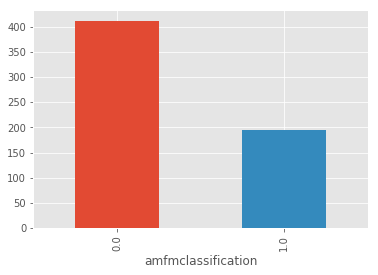

In [118]:
#27
#Creating a bar chart to show a visual representation of distribution of amfc classification variable
print("\n")
print('Creating a bar chart to show a visual representation of distribution of amfc classification variable')
print("\n")
dfbarchartcomparinglabels1with_amfmclassification= diabetesdf[['Class_label1or0','amfmclassification']]
print(dfbarchartcomparinglabels1with_amfmclassification['Class_label1or0'].value_counts())
print("\n")

print('Bar Chart showing the frquency of participants amfmclassification who have the Class label of signs of DR')
barchartamfm= dfbarchartcomparinglabels1with_amfmclassification.loc[dfbarchartcomparinglabels1with_amfmclassification['Class_label1or0'] == 1]
barchartamfm.groupby('amfmclassification').size().plot(kind='bar')


Bar Chart showing the frquency of participants amfmclassification who have the Class label of signs of NO DR


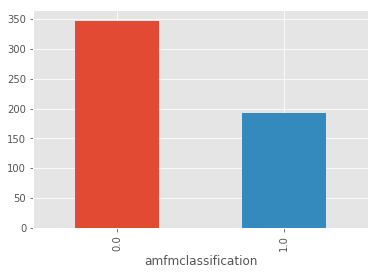

In [119]:
#28
print('Bar Chart showing the frquency of participants amfmclassification who have the Class label of signs of NO DR')
barchartamfm0= dfbarchartcomparinglabels1with_amfmclassification.loc[dfbarchartcomparinglabels1with_amfmclassification['Class_label1or0'] == 0]
barchartamfm0.groupby('amfmclassification').size().plot(kind='bar')



In [120]:
#29
print('Feature Engineering')

Feature Engineering


In [121]:
#30
print('Consideration for feature engineering:')
print("\n")
print('-Variance review and Log normalisation')

#0) quality assessment: No action
#1) retinal abnormality: No action
#2-7) micro aneurysm:
#8-15) exudates:
#16) The euclidean distance:
#17) optic disc diameter:
#18) AM/FM-based classification:
#19) Class label:
   

Consideration for feature engineering:


-Variance review and Log normalisation


In [122]:
#31
print('Variables variance ')
print("\n")
print(diabetesdf.var())
print("\n")
Xdiabetesdf_notnormalised=(diabetesdf.drop(['Class_label1or0','Classlabel0'],axis=1))
ydiabetesdf_notnormalised=(diabetesdf['Class_label1or0'])
print(Xdiabetesdf_notnormalised)

Variables variance 


quality_assessment               0.003481
severe retinal abnormality       0.075362
MA1                            657.633252
MA2                            581.937359
MA3                            520.712741
MA4                            445.969592
MA5                            380.338816
MA6                            227.730062
E1                            3427.231014
E2                             467.685125
E3                             134.156757
E4                              15.446817
E5                               6.196835
E6                               1.122259
E7                               0.159649
E8                               0.032162
euclidean_d                      0.000789
diameterOD                       0.000323
amfmclassification               0.223853
Class_label1or0                  0.249388
Classlabel0                      0.249388
dtype: float64


      quality_assessment  severe retinal abnormality    MA1   MA2   MA3   MA4  

In [123]:
#32

print(' Log normalisation of the euclidean distance feature')
print("\n")
diabetesdf['euclidean_d']=np.log(diabetesdf['euclidean_d'])
print(diabetesdf.var())

 Log normalisation of the euclidean distance feature


quality_assessment               0.003481
severe retinal abnormality       0.075362
MA1                            657.633252
MA2                            581.937359
MA3                            520.712741
MA4                            445.969592
MA5                            380.338816
MA6                            227.730062
E1                            3427.231014
E2                             467.685125
E3                             134.156757
E4                              15.446817
E5                               6.196835
E6                               1.122259
E7                               0.159649
E8                               0.032162
euclidean_d                      0.002935
diameterOD                       0.000323
amfmclassification               0.223853
Class_label1or0                  0.249388
Classlabel0                      0.249388
dtype: float64


In [124]:
#33
print(' Log normalisation of the diameterOD feature')
print("\n")
diabetesdf['diameterOD']=np.log(diabetesdf['diameterOD'])
print(diabetesdf.var())

 Log normalisation of the diameterOD feature


quality_assessment               0.003481
severe retinal abnormality       0.075362
MA1                            657.633252
MA2                            581.937359
MA3                            520.712741
MA4                            445.969592
MA5                            380.338816
MA6                            227.730062
E1                            3427.231014
E2                             467.685125
E3                             134.156757
E4                              15.446817
E5                               6.196835
E6                               1.122259
E7                               0.159649
E8                               0.032162
euclidean_d                      0.002935
diameterOD                       0.026227
amfmclassification               0.223853
Class_label1or0                  0.249388
Classlabel0                      0.249388
dtype: float64


In [125]:
#34
#The MA, microaneurysm features and the E, exudate count features are different representations of the same data but using different confidence intervals.
#In this study we will iterate over the exudate 'E' and microaneursym 'MA'features to find the feature with the best contribution to the model.

#In biomedical research the industry standard for the confidence interval for biomedical research is between 80% and 99%.
#To follow industry standards for acceptable confidence intervals. 
#We will trial MA4 MA5 MA6 and E5, E6, E7, E8. 

In [126]:
#35
print('Checking data types')
diabetesdf.dtypes


Checking data types


quality_assessment            float64
severe retinal abnormality    float64
MA1                           float64
MA2                           float64
MA3                           float64
MA4                           float64
MA5                           float64
MA6                           float64
E1                            float64
E2                            float64
E3                            float64
E4                            float64
E5                            float64
E6                            float64
E7                            float64
E8                            float64
euclidean_d                   float64
diameterOD                    float64
amfmclassification            float64
Class_label1or0                 int64
Classlabel0                      bool
dtype: object

In [127]:
#36
print('Import Scaler and scale features/variables')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddiabetesdf=pd.DataFrame(scaler.fit_transform(diabetesdf),columns=diabetesdf.columns)

Import Scaler and scale features/variables


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
#37
print('Scaled features')
print("\n")
print(scaleddiabetesdf.head())

Scaled features


   quality_assessment  severe retinal abnormality       MA1       MA2  \
0            0.059183                    0.298921 -0.638489 -0.615742   
1            0.059183                    0.298921 -0.560465 -0.532799   
2            0.059183                    0.298921  0.921989  0.960181   
3            0.059183                    0.298921  0.648906  0.669880   
4            0.059183                    0.298921  0.219774  0.296635   

        MA3       MA4       MA5       MA6        E1        E2     ...       \
0 -0.573351 -0.626771 -0.547542 -0.469964 -0.245491 -0.247930     ...        
1 -0.573351 -0.674145 -0.650138 -0.536259 -0.111954  0.030745     ...        
2  1.048803  1.031307  0.940113  0.789637 -0.144055  0.224760     ...        
3  0.785751  0.841813  0.734920  0.657047 -0.406615 -0.216937     ...        
4  0.391173  0.415450  0.529726  0.391868 -0.790110 -0.673774     ...        

         E4        E5        E6        E7        E8  euclidean_d  diameter

In [129]:
#38
Xscaleddiabetesdf=(scaleddiabetesdf.drop(['Class_label1or0','Classlabel0'],axis=1))
yscaleddiabetesdf=(scaleddiabetesdf['Class_label1or0'])

print(Xscaleddiabetesdf)
print(yscaleddiabetesdf)

      quality_assessment  severe retinal abnormality       MA1       MA2  \
0               0.059183                    0.298921 -0.638489 -0.615742   
1               0.059183                    0.298921 -0.560465 -0.532799   
2               0.059183                    0.298921  0.921989  0.960181   
3               0.059183                    0.298921  0.648906  0.669880   
4               0.059183                    0.298921  0.219774  0.296635   
5               0.059183                    0.298921  0.219774  0.255163   
6               0.059183                   -3.345368 -0.365405 -0.325440   
7               0.059183                    0.298921 -1.262680 -1.279289   
8               0.059183                    0.298921 -0.638489 -0.657214   
9               0.059183                    0.298921  1.585192  1.582256   
10              0.059183                    0.298921  0.258786  0.338106   
11              0.059183                   -3.345368 -0.521453 -0.491327   
12          

In [130]:
#39
print('Feature selection')


Feature selection


In [131]:
#40
print('Checking for features that are strongly correlated. If any features are high strongly correlated we will consider removing one of them')

print(diabetesdf.corr())

Checking for features that are strongly correlated. If any features are high strongly correlated we will consider removing one of them
                            quality_assessment  severe retinal abnormality  \
quality_assessment                    1.000000                   -0.017691   
severe retinal abnormality           -0.017691                    1.000000   
MA1                                   0.035479                    0.052657   
MA2                                   0.035828                    0.054156   
MA3                                   0.033284                    0.052324   
MA4                                   0.036393                    0.058249   
MA5                                   0.034682                    0.059595   
MA6                                   0.031737                    0.059106   
E1                                    0.063840                    0.063858   
E2                                    0.063260                    0.053176   
E3     

boxplot of the features with the non scaled featured


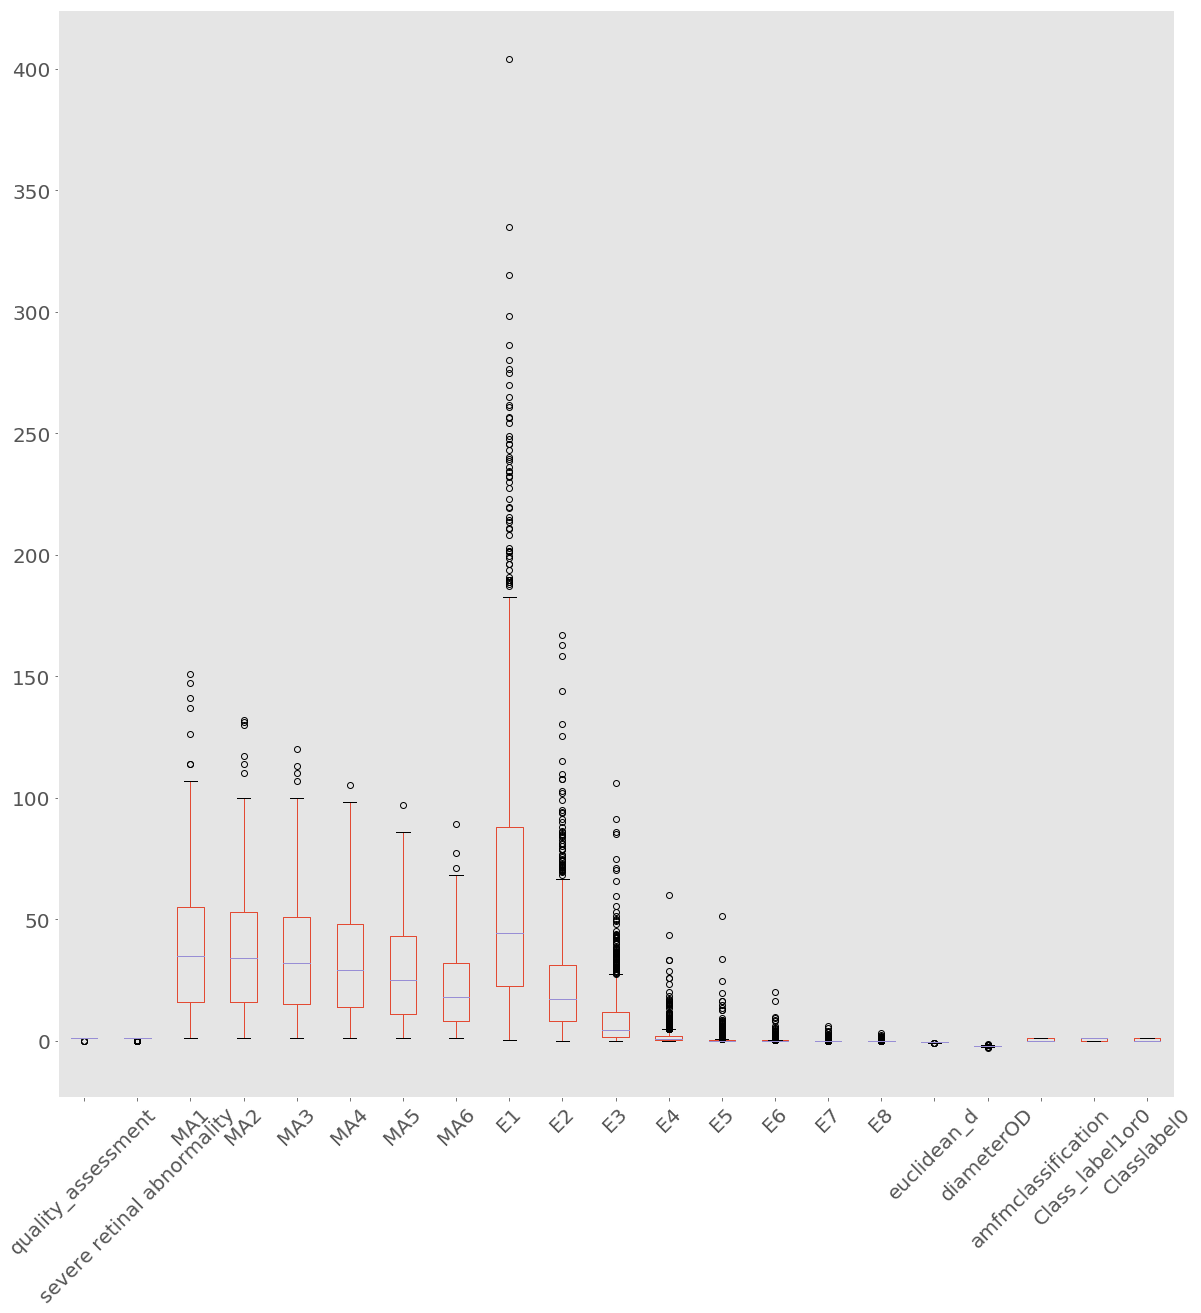

In [40]:
#41
print('boxplot of the features with the non scaled featured')
boxplot = diabetesdf.boxplot(grid=False, rot=45, fontsize=20, figsize=(20,20))

Box plot of features after scaling


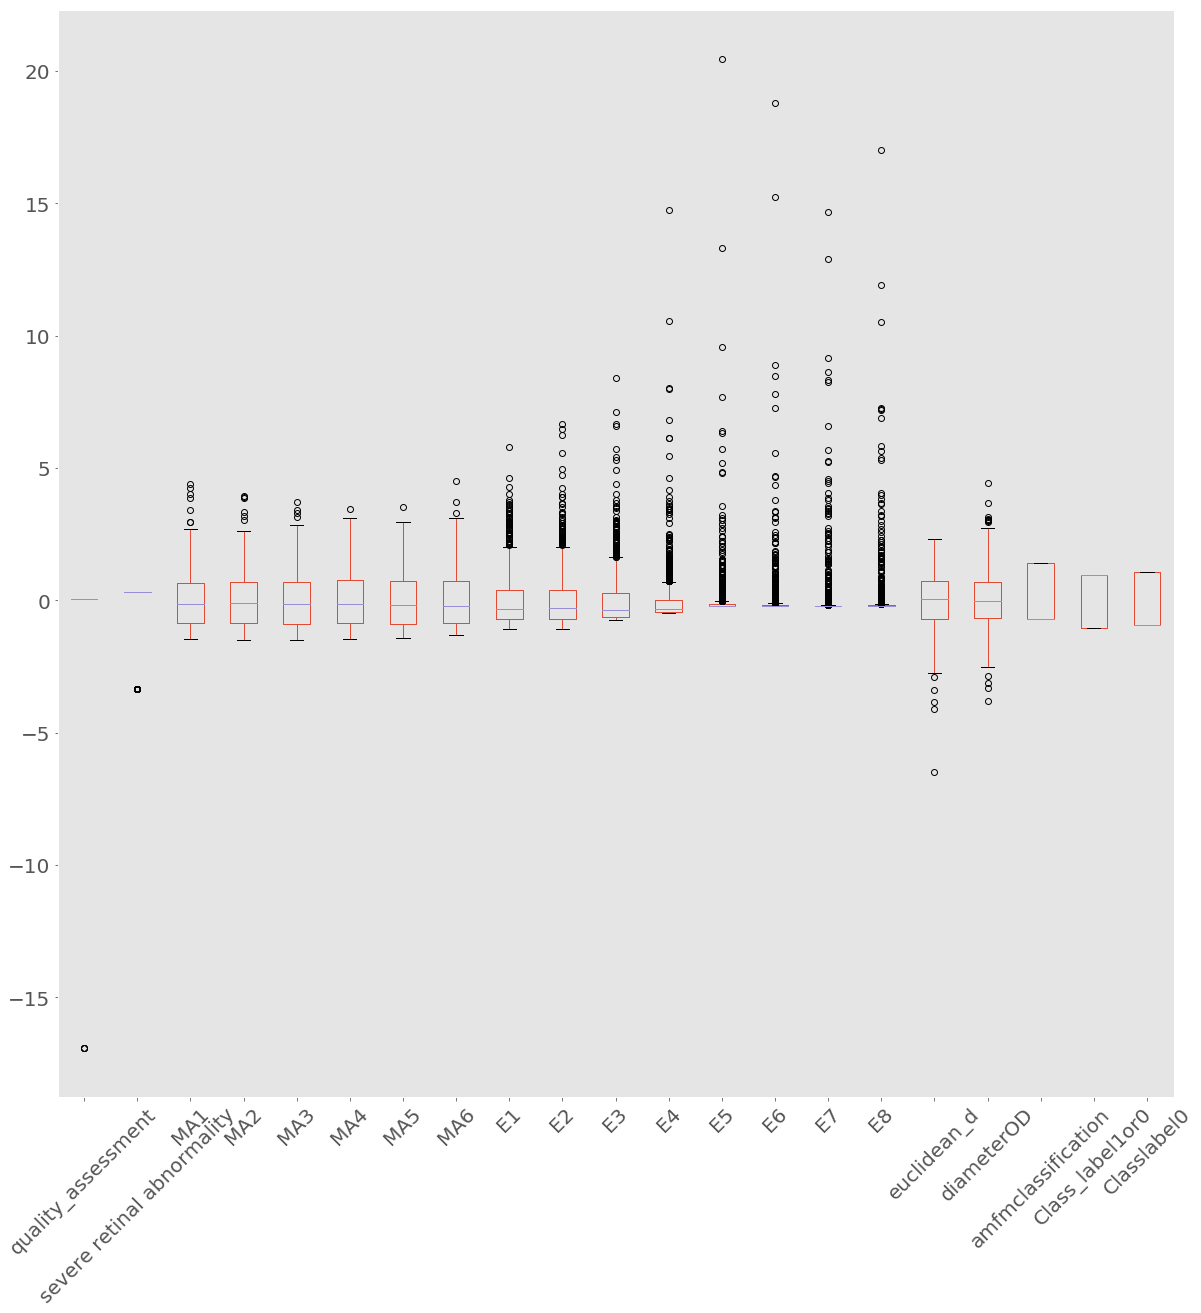

In [124]:
#42
print('Box plot of features after scaling')
boxplot = scaleddiabetesdf.boxplot(grid=False, rot=45, fontsize=20, figsize=(20,20))

In [132]:
#43
print('preparing variables without lable columns')
print("\n")
Xdiabetesdf=diabetesdf.drop(['Class_label1or0','Classlabel0'], axis=1)
ydiabetesdf=diabetesdf['Class_label1or0']

print(Xdiabetesdf)

preparing variables without lable columns


      quality_assessment  severe retinal abnormality    MA1   MA2   MA3   MA4  \
0                    1.0                         1.0   22.0  22.0  22.0  19.0   
1                    1.0                         1.0   24.0  24.0  22.0  18.0   
2                    1.0                         1.0   62.0  60.0  59.0  54.0   
3                    1.0                         1.0   55.0  53.0  53.0  50.0   
4                    1.0                         1.0   44.0  44.0  44.0  41.0   
5                    1.0                         1.0   44.0  43.0  41.0  41.0   
6                    1.0                         0.0   29.0  29.0  29.0  27.0   
7                    1.0                         1.0    6.0   6.0   6.0   6.0   
8                    1.0                         1.0   22.0  21.0  18.0  15.0   
9                    1.0                         1.0   79.0  75.0  73.0  71.0   
10                   1.0                         1.0   45.0  45.0

In [133]:
#44

print(X)

      quality_assessment  severe retinal abnormality    MA1   MA2   MA3   MA4  \
0                    1.0                         1.0   22.0  22.0  22.0  19.0   
1                    1.0                         1.0   24.0  24.0  22.0  18.0   
2                    1.0                         1.0   62.0  60.0  59.0  54.0   
3                    1.0                         1.0   55.0  53.0  53.0  50.0   
4                    1.0                         1.0   44.0  44.0  44.0  41.0   
5                    1.0                         1.0   44.0  43.0  41.0  41.0   
6                    1.0                         0.0   29.0  29.0  29.0  27.0   
7                    1.0                         1.0    6.0   6.0   6.0   6.0   
8                    1.0                         1.0   22.0  21.0  18.0  15.0   
9                    1.0                         1.0   79.0  75.0  73.0  71.0   
10                   1.0                         1.0   45.0  45.0  45.0  43.0   
11                   1.0    

In [134]:
#45
print('Using select K best to calculate the best features with its function')
print("\n")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 19 best features
bestfeatures = SelectKBest(score_func=chi2, k=19)
fit = bestfeatures.fit(Xdiabetesdf_notnormalised,ydiabetesdf_notnormalised)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xdiabetesdf_notnormalised.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(19,'Score'))  #print 10 best features

Using select K best to calculate the best features with its function


                      Features        Score
2                          MA1  1664.968867
3                          MA2  1267.950824
4                          MA3   922.000263
5                          MA4   604.348086
6                          MA5   382.965299
12                          E5   258.780026
8                           E1   226.109761
7                          MA6   191.924240
13                          E6   140.083266
11                          E4   107.107076
14                          E7    73.416895
15                          E8    31.322522
10                          E3    28.448476
18          amfmclassification     1.174897
1   severe retinal abnormality     0.576523
9                           E2     0.150482
0           quality_assessment     0.015723
17                  diameterOD     0.002826
16                 euclidean_d     0.000086


Using a heat map from seaborn to visualise the correlation between features




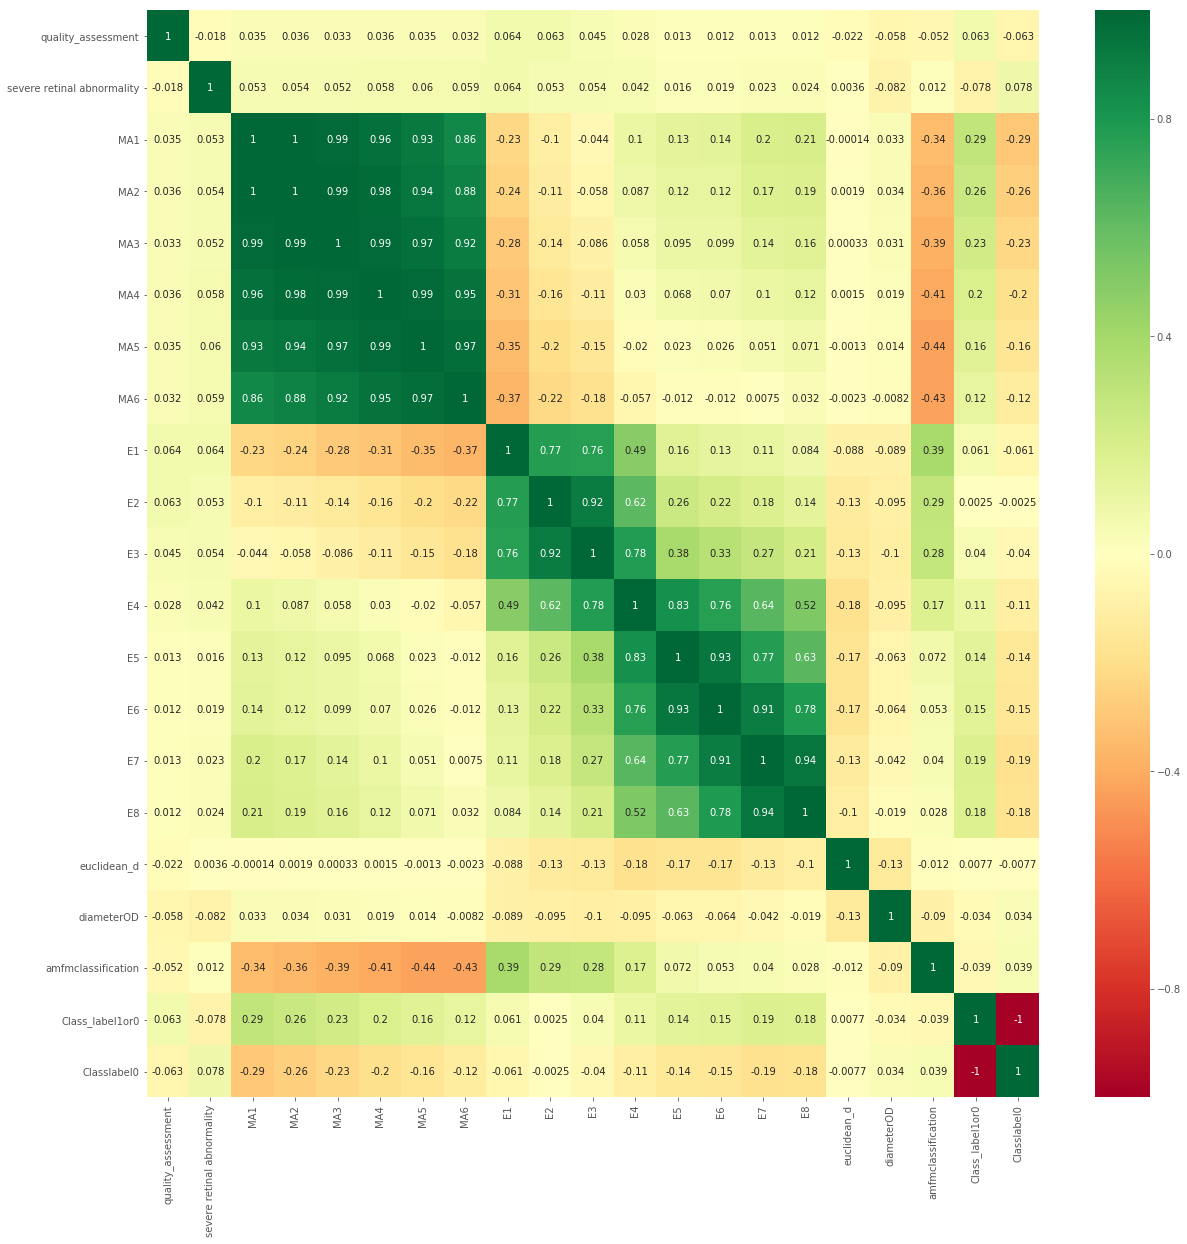

In [44]:
#46
print('Using a heat map from seaborn to visualise the correlation between features')
print("\n")
import seaborn as sns
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = diabetesdf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(diabetesdf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [135]:
#47
print('model training, Selected models to train our classifier are 1. Logistic Regression and 2.Support Vector Machine')

model training, Selected models to train our classifier are 1. Logistic Regression and 2.Support Vector Machine


In [136]:
#48
print('Logistic Regression Model Training')

Logistic Regression Model Training


In [137]:
#49
print('importing modules and spliting training and testing data')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test= train_test_split(Xscaleddiabetesdf,ydiabetesdf_notnormalised)


importing modules and spliting training and testing data


In [138]:
#50
print('Instantiating the Logistic Regression classifier with a Seed=20')
SEED=20
lr = LogisticRegression(solver='liblinear',random_state=SEED)
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

Instantiating the Logistic Regression classifier with a Seed=20
0.7380675203725262
0.7282229965156795


In [139]:
#51
print('Checking the X_train training data set')
print("\n")
print(X_train.head())   

Checking the X_train training data set


     quality_assessment  severe retinal abnormality       MA1       MA2  \
537            0.059183                    0.298921 -1.301692 -1.362232   
998            0.059183                   -3.345368 -1.184656 -1.196345   
850            0.059183                   -3.345368 -1.340704 -1.362232   
576            0.059183                   -3.345368 -0.794537 -0.781629   
218            0.059183                   -3.345368  0.063726  0.130748   

          MA3       MA4       MA5       MA6        E1        E2        E3  \
537 -1.362507 -1.337376 -1.317018 -1.199207  0.295040 -0.068951  0.051788   
998 -1.187139 -1.147881 -1.214421 -1.132912  0.404702  0.227376  0.002840   
850 -1.362507 -1.384749 -1.317018 -1.199207  0.646008 -0.056080 -0.045970   
576 -0.748719 -0.721518 -0.650138 -0.735143 -1.007605 -0.996073 -0.736622   
218  0.215805  0.225955  0.427129  0.458163 -0.862085 -0.805112 -0.600648   

           E4        E5        E6        E7  

In [140]:
#52
print(' Checking the shapes of the train and testing sets')
print("\n")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

 Checking the shapes of the train and testing sets


(859, 19)
(859,)
(287, 19)
(287,)


In [141]:
#53
print('Creating a for loop to calculate the training and testing error of logistic regression classifier with varing C values')
# Train and validaton errors initialized as empty list
train_errs = list()
test_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000,3000, 5000,10000]:
    # Create LogisticRegression object and fit
    lr1 = LogisticRegression(C=C_value,solver='liblinear')
    lr1.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr1.score(X_train, y_train) )
    test_errs.append( 1.0 - lr1.score(X_test, y_test) )
    


Creating a for loop to calculate the training and testing error of logistic regression classifier with varing C values


In [142]:
#54
print('Printing the list of train and test error score values for the varying C values')
print("\n")
print('Train error scores')
print(train_errs)
print("\n")
print('Test error scores')
print(test_errs)
print("\n")
print('Print C Value to Check to see if all C values were tested')
print(C_value)

Printing the list of train and test error score values for the varying C values


Train error scores
[0.3958090803259604, 0.3527357392316647, 0.3084982537834692, 0.2619324796274738, 0.2502910360884749, 0.2514551804423748, 0.24563445867287548, 0.24563445867287548, 0.24563445867287548, 0.24563445867287548]


Test error scores
[0.35540069686411146, 0.313588850174216, 0.27177700348432055, 0.27177700348432055, 0.264808362369338, 0.25435540069686413, 0.25087108013937287, 0.25087108013937287, 0.25087108013937287, 0.25087108013937287]


Print C Value to Check to see if all C values were tested
10000


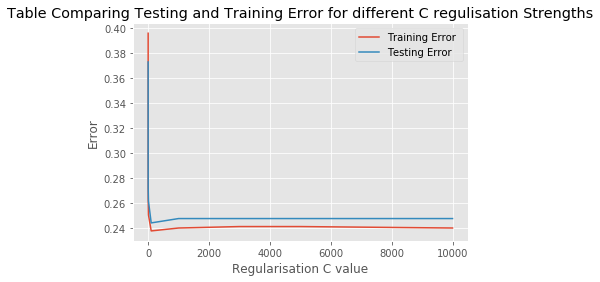

In [143]:
#55
# line 1 points
trainingerrors_per_C = [0.3958090803259604, 0.3422584400465658, 0.29452852153667053, 0.2630966239813737, 0.2502910360884749, 0.23748544819557627, 0.23981373690337604, 0.24097788125727593, 0.24097788125727593, 0.23981373690337604]
C1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000,3000,5000,10000]
# plotting the line 1 points 
plt.plot( C1,trainingerrors_per_C, label = "Training Error ")
# line 2 points
testingerrors_per_C = [0.372822299651568, 0.32752613240418116, 0.29965156794425085, 0.27177700348432055, 0.26132404181184665, 0.24390243902439024, 0.2473867595818815, 0.2473867595818815, 0.2473867595818815, 0.2473867595818815]
C2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000,3000,5000,10000]
# plotting the line 2 points 
plt.plot( C2,testingerrors_per_C, label = "Testing Error")
plt.xlabel('Regularisation C value')
# Set the y axis label of the current axis.
plt.ylabel('Error')
# Set a title of the current axes.
plt.title('Table Comparing Testing and Training Error for different C regulisation Strengths')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [144]:
#56
print('The above graph plot shows that the optimal C strength for reducing the error rate is 100, so this will be used.')

The above graph plot shows that the optimal C strength for reducing the error rate is 100, so this will be used.


In [145]:
#57
#from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
#c_space = np.logspace(1, 10000, 10)
#param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
#vlogregGS = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
#logreg_cv = GridSearchCV(logregGS, param_grid, cv=5)

# Fit it to the data
#logreg_cv.fit(Xscaleddiabetesdf,ydiabetesdf_notnormalised)

# Print the tuned parameters and score
#print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
#print("Best score is {}".format(logreg_cv.best_score_))


In [146]:
#58
print('Run the model with the top performing C regularisation strength')

lr = LogisticRegression(C=100,solver='liblinear',random_state=20)
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
y_pred=lr.predict(X_test)


Run the model with the top performing C regularisation strength
0.7485448195576252
0.7456445993031359


In [147]:
#59
print(' Run the model with the top 10 features only to see if the performance is better')
X10scaleddiabetesdf=Xscaleddiabetesdf[['MA1','MA2','MA3', 'MA4', 'MA5', 'E5','E1','MA6','E6','E4']]

X_train2,X_test2,y_train2,y_test2= train_test_split(X10scaleddiabetesdf,ydiabetesdf_notnormalised)

 Run the model with the top 10 features only to see if the performance is better


In [148]:
#60
print(" As we can see the performance is worse")
print('\n')
lr2 = LogisticRegression(C=1000,solver='liblinear', random_state=20)
lr2.fit(X_train2,y_train2)
print('The train score with previously calculated top ten features')

print(lr2.score(X_train2,y_train2))
print('\n')
print('The test score with previously calculated top ten features')

print(lr2.score(X_test2,y_test2))




 As we can see the performance is worse


The train score with previously calculated top ten features
0.7497089639115251


The test score with previously calculated top ten features
0.7700348432055749


In [149]:
#61
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Evaluating the Logistic Regression Model: Confusion matrix')
print('\n')
cm=(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')


print('Evaluating the Logistic Regression Model: Classification report')
print('\n')
print(classification_report(y_test, y_pred))




Evaluating the Logistic Regression Model: Confusion matrix


[[112  27]
 [ 46 102]]


Evaluating the Logistic Regression Model: Classification report


              precision    recall  f1-score   support

           0       0.71      0.81      0.75       139
           1       0.79      0.69      0.74       148

   micro avg       0.75      0.75      0.75       287
   macro avg       0.75      0.75      0.75       287
weighted avg       0.75      0.75      0.75       287



In [150]:

sensitivityLR=(cm[1][1])/((cm[1][1])+(cm[1][0]))

print('The sensitivity of the Logistic Regression classifier is:')

print(sensitivityLR)
print('\n')
print('The specificity of the Logistic Regression classifier is:')
specificityLR=(cm[0][0])/((cm[0][0])+(cm[0][1]))

print(specificityLR)




The sensitivity of the Logistic Regression classifier is:
0.6891891891891891


The specificity of the Logistic Regression classifier is:
0.8057553956834532


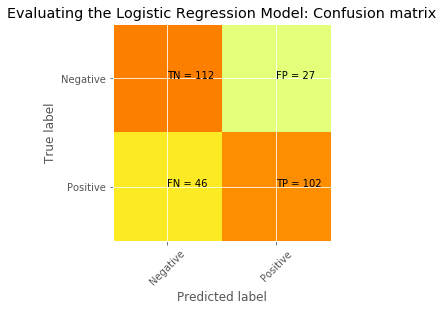

In [151]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Evaluating the Logistic Regression Model: Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

ROC Curve


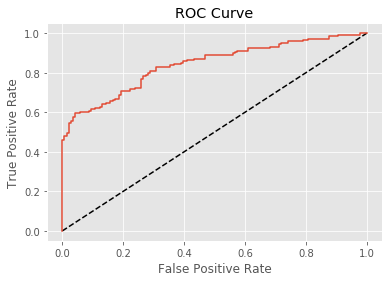

In [152]:
#62
print('ROC Curve')

from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [153]:
#63
print( 'Area under the curve')
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

Area under the curve


0.8422613260742756

In [154]:
#64
print('The cross validation scores using 5 folds')
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr, Xscaleddiabetesdf,ydiabetesdf_notnormalised, cv=5,scoring='roc_auc' )
print(cv_score)
print('\n')
print('The mean cross validation score using 5 folds')
print(cv_score.mean())



The cross validation scores using 5 folds
[0.82354281 0.79400061 0.86088154 0.84641873 0.81351393]


The mean cross validation score using 5 folds
0.8276715239829994


In [155]:
#65
print('Support Vector Machine classifer ')

Support Vector Machine classifer 


In [156]:
#66
print('Importing modules of SVC and gridsearchCV')
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Importing modules of SVC and gridsearchCV


In [157]:
#67
# Instantiate an RBF SVM
#svm = SVC()

# Instantiate the GridSearchCV object and run the search
#parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
#searcher = GridSearchCV(svm, parameters)
#searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
#print("Best CV params", searcher.best_params_)
#print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
#print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

In [158]:
#68
# Instantiate an RBF SVM
print('Instantiate an RBF SVM')
print('\n')
svm = SVC(random_state=20)

X_trainSVM=X_train
y_trainSVM=y_train
X_testSVM=X_test
y_testSVM=y_test

# Instantiate the GridSearchCV object and run the search
print('Instantiate the GridSearchCV object and run the searchM')
parameters = {'C':[0.001, 0.01, 0.1, 1,10,100,1000,10000,100000], 'gamma':[0.00001, 0.0001, 0.001, 0.1,1.0,2.0]}
print('\n')
searcher = GridSearchCV(svm, parameters,cv=5)
searcher.fit(X_trainSVM,y_trainSVM)




Instantiate an RBF SVM


Instantiate the GridSearchCV object and run the searchM




/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=20,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1e-05, 0.0001, 0.001, 0.1, 1.0, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [159]:
#69

print('Report the best parameters and the corresponding score of the grid search')
print('\n')
print("Best CV params", searcher.best_params_)
print('\n')
print("Best CV accuracy", searcher.best_score_)
print('\n')



# Report the test accuracy using these best parameters
print("Train accuracy of best grid search hypers:", searcher.score(X_trainSVM, y_trainSVM))
print('\n')
print("Test accuracy of best grid search hypers:", searcher.score(X_testSVM, y_testSVM))

Report the best parameters and the corresponding score of the grid search


Best CV params {'C': 100000, 'gamma': 0.0001}


Best CV accuracy 0.7427240977881258


Train accuracy of best grid search hypers: 0.7881257275902211


Test accuracy of best grid search hypers: 0.7839721254355401


In [160]:
#70
print('Run the searcher prediction on the the test features set')
y_predSVM=searcher.predict(X_testSVM)

Run the searcher prediction on the the test features set


In [161]:
#71
print('Evaluating the SVM: Confusion matrix')
print('\n')
cm1=(confusion_matrix(y_testSVM, y_predSVM))
print(confusion_matrix(y_testSVM, y_predSVM))
print('\n')


print('Evaluating the SVM: Classification report')
print('\n')
print(classification_report(y_testSVM, y_predSVM))




Evaluating the SVM: Confusion matrix


[[121  18]
 [ 44 104]]


Evaluating the SVM: Classification report


              precision    recall  f1-score   support

           0       0.73      0.87      0.80       139
           1       0.85      0.70      0.77       148

   micro avg       0.78      0.78      0.78       287
   macro avg       0.79      0.79      0.78       287
weighted avg       0.79      0.78      0.78       287



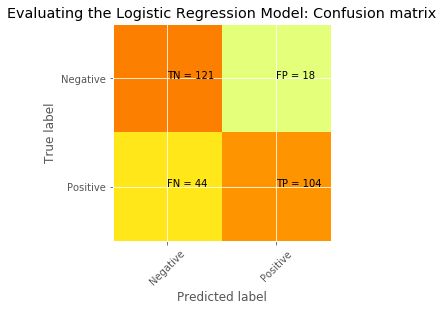

In [162]:
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Evaluating the Logistic Regression Model: Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
ss = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(ss[i][j])+" = "+str(cm1[i][j]))
plt.show()

In [163]:

sensitivitySVM=(cm1[1][1])/((cm1[1][1])+(cm1[1][0]))

print('The sensitivity of the SVM is:')

print(sensitivitySVM)
print('\n')
print('The specificity of the SVM is:')
specificitySVM=(cm1[0][0])/((cm1[0][0])+(cm1[0][1]))

print(specificitySVM)



The sensitivity of the SVM is:
0.7027027027027027


The specificity of the SVM is:
0.8705035971223022


In [164]:
#72
print(svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=20,
  shrinking=True, tol=0.001, verbose=False)


In [171]:
#73
svc1=SVC(C=100000,gamma=0.001,random_state=20,probability=True)

print(svc1)



SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=20, shrinking=True,
  tol=0.001, verbose=False)


In [172]:
#74
svc1.fit(X_trainSVM,y_trainSVM)
print('Support Vector Machine train score')
print(svc1.score(X_trainSVM,y_trainSVM))
print('\n')
print('Support Vector Machine test score')
print(svc1.score(X_testSVM,y_testSVM))



Support Vector Machine train score
0.8183934807916181


Support Vector Machine test score
0.7560975609756098


In [173]:
#75
# Compute predicted probabilities: y_pred_prob
print('Compute predicted probabilities: y_pred_prob')
y_pred_probSVM = svc1.predict_proba(X_testSVM)[:,1]


Compute predicted probabilities: y_pred_prob


ROC Curve SVM


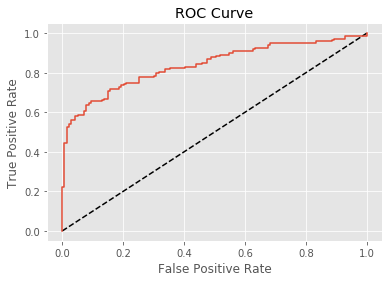

In [174]:
#76
print('ROC Curve SVM')

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_testSVM, y_pred_probSVM)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [175]:
#77
print( 'Area under the curve')
from sklearn.metrics import roc_auc_score
roc_auc_score(y_testSVM, y_pred_probSVM)

Area under the curve


0.8385669842504373

In [176]:
#78
print('The cross validation scores of SVM using 5 folds')
cv_scoreSVM=cross_val_score(svc1, X_trainSVM,y_trainSVM, cv=5,scoring='roc_auc' )
print(cv_score)
print('\n')
print('The mean cross validation of SVM score using 5 folds')
print(cv_scoreSVM.mean())




The cross validation scores of SVM using 5 folds
[0.82354281 0.79400061 0.86088154 0.84641873 0.81351393]


The mean cross validation of SVM score using 5 folds
0.8000894221184076
